In [1]:
from IPython.display import Image as IPImage
from PIL import Image
import numpy as np

In [2]:
def calcFreeBits(imgSize, key):
    w, h = imgSize
    r_bit, g_bit, b_bit = key
    return (r_bit + g_bit + b_bit) * w * h
    

def calcMaxBytes(imgSize, key):
    w, h = imgSize
    r_bit, g_bit, b_bit = key
    return (r_bit + g_bit + b_bit) * w * h // 8

In [3]:
r_bit, g_bit, b_bit = 2, 1, 2
key = r_bit, g_bit, b_bit

img_source = "24bit_2s.bmp"
img_encode = "encode.bmp"
img_decode = "decode.bmp"

img_png_s = "s.png"
img_png_e = "e.png"
img_png_d = "d.png"

text_utf8_path = "text.txt"

img = Image.open(img_source)
size = img.size
raw = np.asarray(img, dtype=np.uint8)

print(raw.shape)

(360, 640, 3)


In [4]:
byte_text = b""

with open(text_utf8_path, encoding='utf-8') as f: 
    byte_text = f.read().encode("UTF-8")
    

if calcMaxBytes(size, key) < len(byte_text):
    print("Не хватает места для записи в картинку")

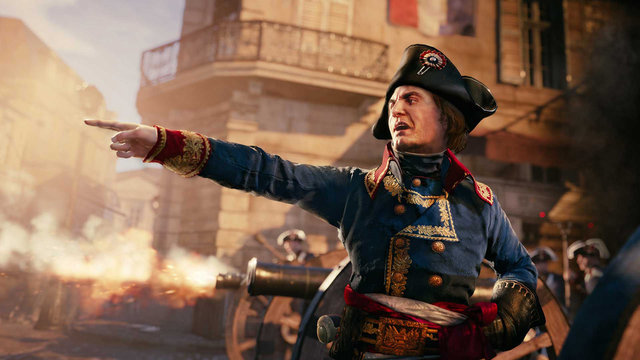

In [5]:
# Конвентируем в png чтобы отобразить тут
Image.open(img_source).save(img_png_s)
IPImage(img_png_s)

In [6]:
def encode(rawData, byte_text, key):
    data = np.copy(rawData)
    data.setflags(write = True)
    
    r_shift, g_shift, b_shift = key
    
    len_bytes = len(byte_text)
    byte_index = 0
    bit_shift = 0
    for row in data:
        for pixel in row:
            a = (pixel[0] >> r_shift) << r_shift
            b = (byte_text[byte_index] << bit_shift) % 256 >> (8 - r_shift)
#             print(f"red\ndo: {bin(pixel[0])[2:]}\nsh: {r_shift}\nre: {bin(a)[2:]}\n &: {bin(b)[2:]}\npo: {bin(a ^ b)[2:]}")
            pixel[0] = a ^ b
            bit_shift += r_shift
            if bit_shift >= 8:
                bit_shift %= 8
                byte_index += 1
            if byte_index == len_bytes:
                break
                
            a = (pixel[1] >> g_shift) << g_shift
            b = (byte_text[byte_index] << bit_shift) % 256 >> (8 - g_shift)
#             print(f"green\ndo: {bin(pixel[0])[2:]}\nsh: {r_shift}\nre: {bin(a)[2:]}\n &: {bin(b)[2:]}\npo: {bin(a ^ b)[2:]}")
            pixel[1] = a ^ b
            bit_shift += g_shift
            if bit_shift >= 8:
                bit_shift %= 8
                byte_index += 1
            if byte_index == len_bytes:
                break
                
            a = (pixel[2] >> r_shift) << r_shift
            b = (byte_text[byte_index] << bit_shift) % 256 >> (8 - r_shift)
#             print(f"blue\ndo: {bin(pixel[0])[2:]}\nsh: {r_shift}\nre: {bin(a)[2:]}\n &: {bin(b)[2:]}\npo: {bin(a ^ b)[2:]}")
            pixel[2] = a ^ b
            bit_shift += b_shift
            if bit_shift >= 8:
                bit_shift %= 8
                byte_index += 1
            if byte_index == len_bytes:
                break
                
        if byte_index == len_bytes:
            break      
    return data

Image.fromarray(encode(raw, byte_text, key)).save(img_encode)

In [7]:
def p(x):
    print(bin(x)[2:])
v = 245
p(v)
print(v)

v = v << 1
p(v)
p(v%256)

11110101
245
111101010
11101010


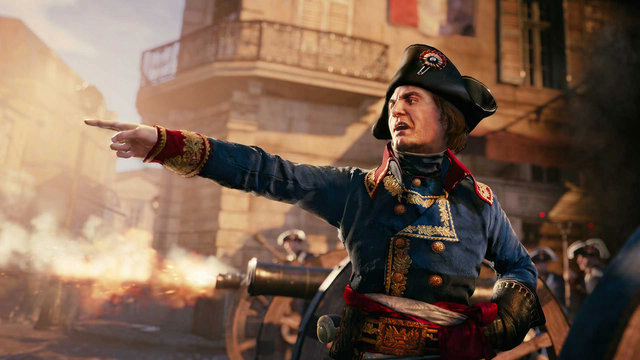

In [8]:
# Конвентируем в png чтобы отобразить тут

Image.open(img_encode).save(img_png_e)
IPImage(img_png_e)